<a href="https://colab.research.google.com/github/zczlxd1/zczlxd1-Genshin-impact-Character-Recognition/blob/main/Genshin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第一步首先导入fastbook的数据库

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.1 MB/s 
     |████████████████████████████████| 342 kB 5.1 MB/s 
     |████████████████████████████████| 197 kB 69.4 MB/s 
     |████████████████████████████████| 4.2 MB 74.7 MB/s 
     |████████████████████████████████| 1.2 MB 70.0 MB/s 
     |████████████████████████████████| 59 kB 9.2 MB/s 
     |████████████████████████████████| 136 kB 78.1 MB/s 
     |████████████████████████████████| 84 kB 4.6 MB/s 
     |████████████████████████████████| 1.1 MB 66.6 MB/s 
     |████████████████████████████████| 212 kB 73.9 MB/s 
     |████████████████████████████████| 127 kB 93.0 MB/s 
     |████████████████████████████████| 144 kB 95.3 MB/s 
     |████████████████████████████████| 94 kB 5.0 MB/s 
     |████████████████████████████████| 271 kB 98.1 MB/s 
     |████████████████████████████████| 6.6 MB 65.5 MB/s 
     |████████████████████████████████| 596 kB 68.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the pa

In [2]:
from fastbook import *
from fastai.vision.widgets import *

第二部通过key链接你的Azure账户

In [3]:
key = os.environ.get('AZURE_SEARCH_KEY','34fba19a2da04d5aafd9669ca87b0370')

In [4]:
search_images_bing
results = search_images_bing(key,'Genshin')
ims = results.attrgot('contentUrl')
len(ims)


150

In [5]:
dest = 'images/Genshin.jpg'
download_url(ims[0],dest)

Path('images/Genshin.jpg')

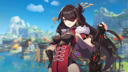

In [6]:
im = Image.open(dest)
im.to_thumb(128,128)

In [7]:
Genshin_types = 'Hutao','Zhongli','Xiao','Ganyu','Diluc','Mona'
path = Path('genshin')

In [8]:
if not path.exists():
  path.mkdir()
  for o in Genshin_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} Genshin')
    download_images(dest,urls = results.attrgot('contentUrl'))

In [9]:
fns = get_image_files(path)
fns

(#824) [Path('genshin/Zhongli/00000062.jpg'),Path('genshin/Zhongli/00000079.jpg'),Path('genshin/Zhongli/00000035.jpg'),Path('genshin/Zhongli/00000108.jpg'),Path('genshin/Zhongli/00000068.jpg'),Path('genshin/Zhongli/00000109.jpg'),Path('genshin/Zhongli/00000141.jpg'),Path('genshin/Zhongli/00000005.jpg'),Path('genshin/Zhongli/00000007.jpg'),Path('genshin/Zhongli/00000014.jpg')...]

In [10]:
failed = verify_images(fns)
failed

(#13) [Path('genshin/Zhongli/00000035.jpg'),Path('genshin/Zhongli/00000116.jpg'),Path('genshin/Zhongli/00000006.jpg'),Path('genshin/Zhongli/00000097.jpg'),Path('genshin/Zhongli/00000012.jpg'),Path('genshin/Zhongli/00000112.jpg'),Path('genshin/Xiao/00000115.jpg'),Path('genshin/Xiao/00000012.jpg'),Path('genshin/Ganyu/00000046.png'),Path('genshin/Diluc/00000030.jpg')...]

In [11]:
failed.map(Path.unlink);

In [12]:
Genshin = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [13]:
dls = Genshin.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


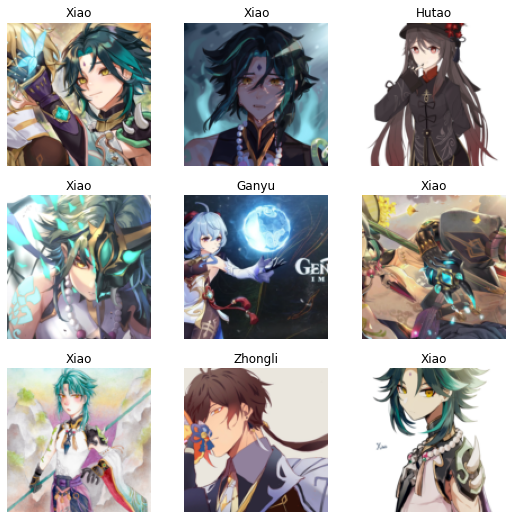

In [14]:
dls.valid.show_batch(max_n=9, nrows=3)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


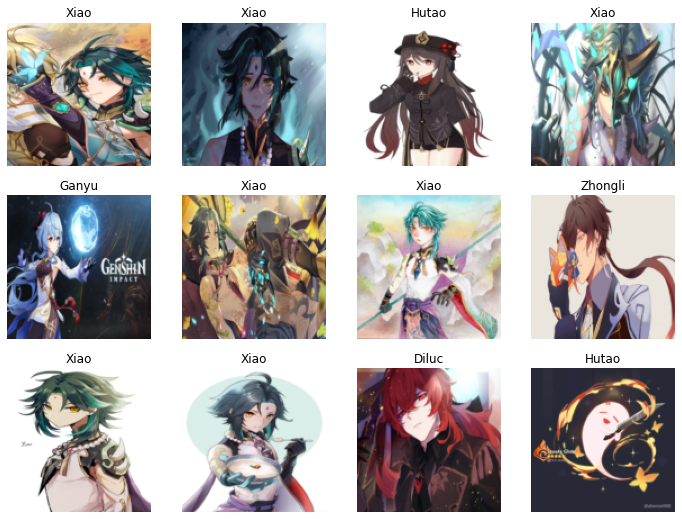

In [15]:
Genshin = Genshin.new(item_tfms=Resize(128,ResizeMethod.Squish))
dls = Genshin.dataloaders(path)
dls.valid.show_batch(max_n=12,nrows=3)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


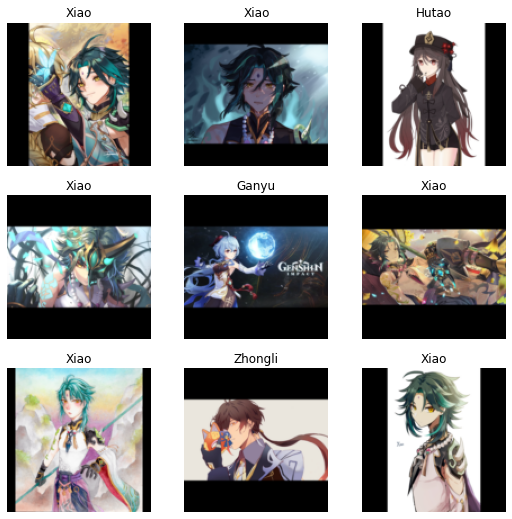

In [16]:
Genshin = Genshin.new(item_tfms=Resize(128,ResizeMethod.Pad, pad_mode='zeros'))
dls = Genshin.dataloaders(path)
dls.valid.show_batch(max_n=9,nrows=3)

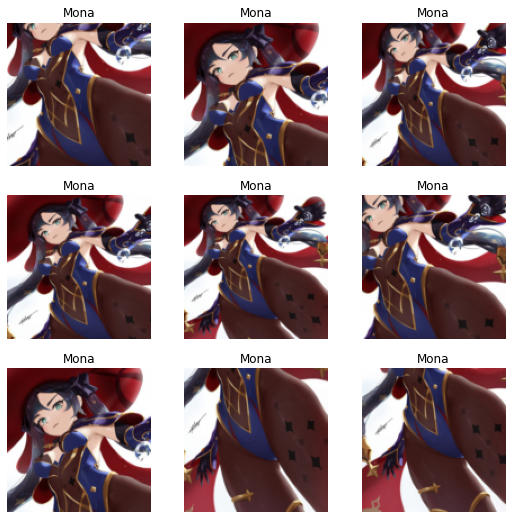

In [17]:
Genshin = Genshin.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Genshin.dataloaders(path)
dls.train.show_batch(max_n=9,nrows=3,unique=True)

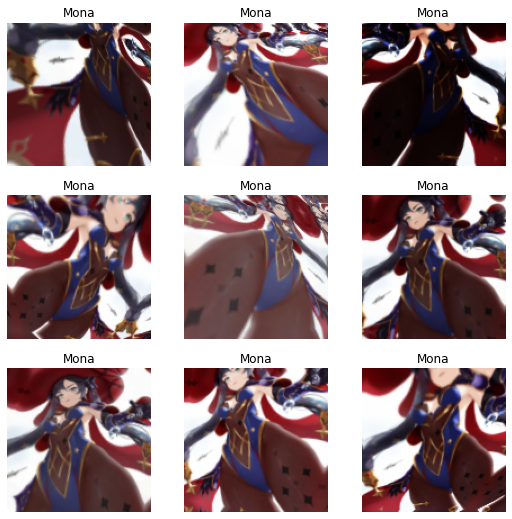

In [18]:
Genshin = Genshin.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=2))
dls = Genshin.dataloaders(path)
dls.train.show_batch(max_n=9, nrows=3, unique=True)

In [19]:
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


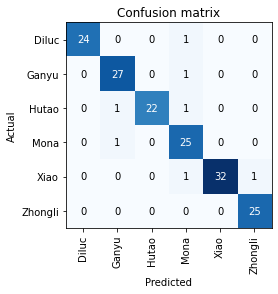

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

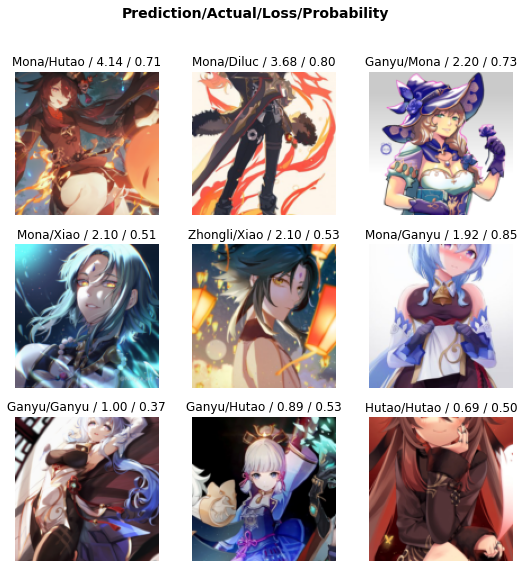

In [21]:
interp.plot_top_losses(9,nrows=3)

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [23]:
learn.export()

In [24]:
path = Path()
path.ls(file_exts='pkl')


(#0) []

In [25]:
learn_inf = load_learner(path/'export.pkl')

In [26]:
learn_inf.predict('images/Genshin.jpg')

('Hutao',
 TensorBase(2),
 TensorBase([1.6435e-04, 4.5002e-02, 4.7019e-01, 4.6994e-01, 1.4524e-02, 1.7492e-04]))

In [27]:
learn_inf.dls.vocab

['Diluc', 'Ganyu', 'Hutao', 'Mona', 'Xiao', 'Zhongli']

In [28]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [29]:
img = PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [30]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [31]:
pred,pred_idx,probs = learn_inf.predict(img)

NameError: ignored

In [33]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction:{pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

NameError: ignored

In [34]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [35]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl:display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [36]:
#putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select you figure!'),
     btn_upload, btn_run,out_pl, lbl_pred])

In [39]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [38]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila  OK
